## Часть 1. Парсинг (10 баллов)

Мы предлагаем вам распарсить часть данных litres.ru — а именно часть про книги, имеющие отношение к программированию.

Они находятся в этом каталоге: https://www.litres.ru/genre/programmirovanie-5272/

Вам нужно собрать датасет о книгах с первых 40-ти страниц каталога (около 960 книг.)
*Подсказка.* Можете начать с исследования html кода этой страницы.

Вам необходимо собрать датасет, содержащий следующие данные:
* name: название книги
* author: автор
* link: ссылка на книгу
* rating: рейтинг по 5-балльной шкале
* rating_count: количество оценок
* review_count: количество отзывов
* pages_count: объем (число страниц)
* price: цена
* text_reviews: тексты отзывов: список строк
* age: возрастное ограничение
* year: год написания

В дальнейшем вам нужно будет анализировать полученный у вас датасет.

Если у вас не получилось спарсить датасет, воспользуйтесь для последующих пунктов готовым датасетом: https://disk.yandex.ru/d/2UZet2-qxRxF6Q

 Так вы сможете получить баллы за вторую часть.

(Датасет неидеален, с ним придется поработать!)

**Парсите "вежливо": используйте time.sleep() не меньше 1-2 секунд между запросами к сайту!**

## Часть 2. EDA (30 баллов)

1. Выведите первые 5 строк датасета. (0.25). Сколько в нём строк и столбцов (0.25)?
2. Есть ли в датасете пропуски? (0.5)
3. Проверьте типы данных. Если это необходимо, приведите к типам int и float те столбцы, с которыми понадобится работать как с числами. (1).
4. Выведите описательные статистики переменных. Ответьте на следующие вопросы:

* Какая медианная цена книги в вашем датасете? (1)  
* Какое возрастное ограничение встречается чаще всего? (1)  
* Какое среднее число отзывов в книге? (1)  
* Сколько книг имеют оценку ниже 4.25? (1)  
* В каком году было написано больше всего книг из датасета? (1)  

5. Если вы работаете с готовым датасетом, то попробуйте "достать" из столбца pages количество страниц. Если у вас не получилось, то далее при определении числа страниц пользуйтесь стольцов pages_count. Если вы парсили датасет сами, то вы получаете балл за этот пункт автоматически (1.5)

6. Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях. (1)

7. Как отличается среднее число страниц среди популярных и непопулярных книг? (2)

8. Выведите топ-10 книг по числу отзывов. (2).

9. Найдите среднюю длину отзыва (в символах). (2)

10. Постройте таблицу корреляций числовых переменных. (1) Прокомментируйте результаты. (1)

11. Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. Не забудьте подписать график и оси. (1) Прокомментируйте полученные результаты. (1)

12. Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)

12. Постройте еще любые два графика по вашему усмотрению. (2) Прокомментируйте полученные результаты. (1.5)

13. Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов. (2).

14. Что еще интересного можно увидеть в этом датасете? Просмотрите на данные и ответьте на какие-нибудь вопросы, на которые не ответили в предыдущим пункте. Мы никак не ограничиваем вашу фантазию! (3).

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [26]:
df = pd.read_csv("litres_programming_data.csv")

In [17]:
# 1
print(df.shape)
df.head() # 13 столбцов, 965 строк

(965, 13)


,Unnamed: 0,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year
0,0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12+,2023
1,1,Python 3 и PyQt 6. Разработка приложений,Николай Прохоренок,https://www.litres.ru/book/vladimir-dronov/pyt...,4.7,3,1,549.0,831 стр.,831,"['Большая книга, посвященная реализации графич...",0+,2023
2,3,Система взаимодействия. Коммуникации в бизнес-...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/sist...,4.3,10,3,250.0,130 стр.,130,['Полезная книга. Есть примеры оповещения поль...,12+,2019
3,4,Постановка задачи обеспечения автоматизации по...,О. В. Тиханычев,https://www.litres.ru/book/o-v-tihanychev/post...,0.0,0,0,168.0,10 стр.,10,[],0+,2021
4,7,Разработка и реализация портальных решений. Пр...,С. В. Маркова,https://www.litres.ru/book/pavel-lukyanov/razr...,0.0,0,0,350.0,166 стр.,166,[],0+,2020


In [18]:
# 2 Нет пропусков
df.isnull().sum()

Unnamed: 0         0
name               0
author             0
link               0
rating             0
rating_count       0
review_count       0
price              0
pages              0
pages_count        0
text_of_reviews    0
age                0
year               0
dtype: int64

In [19]:
df.isna().sum()

Unnamed: 0         0
name               0
author             0
link               0
rating             0
rating_count       0
review_count       0
price              0
pages              0
pages_count        0
text_of_reviews    0
age                0
year               0
dtype: int64

In [27]:
# 3
df.dtypes

Unnamed: 0           int64
name                object
author              object
link                object
rating             float64
rating_count         int64
review_count         int64
price              float64
pages               object
pages_count          int64
text_of_reviews     object
age                 object
year                 int64
dtype: object

In [28]:
# Перевод столбца age в тип даннных int
df['age'] = df['age'].str[:-1]
df['age'] = df['age'].astype (int)
df['age']

0      12
1       0
2      12
3       0
4       0
       ..
960     0
961    12
962     0
963    16
964     0
Name: age, Length: 965, dtype: int32

In [29]:
df.dtypes

Unnamed: 0           int64
name                object
author              object
link                object
rating             float64
rating_count         int64
review_count         int64
price              float64
pages               object
pages_count          int64
text_of_reviews     object
age                  int32
year                 int64
dtype: object

In [35]:
# 4 
df.describe

<bound method NDFrame.describe of      Unnamed: 0                                               name  \
0             0                                   Нейросети начало   
1             1           Python 3 и PyQt 6. Разработка приложений   
2             3  Система взаимодействия. Коммуникации в бизнес-...   
3             4  Постановка задачи обеспечения автоматизации по...   
4             7  Разработка и реализация портальных решений. Пр...   
..          ...                                                ...   
960        1192  Основы вычислений и программирования в пакете ...   
961        1193  Справочник Жаркова по проектированию и програм...   
962        1195  Применение компьютерных систем моделирования т...   
963        1196                       Основы TypeScript (pdf+epub)   
964        1197  Идентификация типа файла на основе структурног...   

                        author  \
0                 Джейд Картер   
1           Николай Прохоренок   
2             Е. Ю. Хру

In [36]:
# 5 Медиана цены 200
df["price"].median()

200.0

In [38]:
# 6 Мода возрастного ограничения 0+
df["age"].mode()

0    0
Name: age, dtype: int32

In [39]:
# 7 Среднее количество отзывов 1.6
df["review_count"].mean()

1.6031088082901555

In [41]:
# 8 619 книг с рейтингом меньше 4.25
df["rating"].loc[df['rating'] < 4.25].count()

619

In [42]:
# 9 в 2021 году было написано больше всего книг
df["year"].mode()

0    2021
Name: year, dtype: int64

In [46]:
# 10
df['pages'] = df['pages'].str.extract('(\d+)')

In [61]:
df['pages'] = df['pages'].astype(int)

In [50]:
# 11 Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях.
def f(row):
    if row['rating'] >= 4.6 and row["review_count"] >= 5:
        val = 1
    else:
        val = 0
    return val

df['is_popular'] = df.apply (f, axis=1)

In [63]:
# 12 на 164 страницы в среднем популярные книги больше, чем не популярные
df["pages"].loc[df['is_popular'] == 1].mean() - df["pages"].loc[df['is_popular'] == 0].mean()

164.34140541264736

In [67]:
# 13 
df.sort_values(by=['review_count'], ascending=False).head(10)

,Unnamed: 0,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,is_popular
0,0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102,102,['Книга отличная. Давно хотела понять как все ...,12,2023,1
775,961,Теоретический минимум по Computer Science. Все...,Владстон Феррейра Фило,https://www.litres.ru/book/vladston-ferreyra-f...,3.9,94,28,599.0,224,224,['Прекрасная книга. Рекомендовал и старшим шко...,16,2017,0
98,117,#Сам себе программист. Как научиться программи...,Кори Альтхофф,https://www.litres.ru/book/kori-althoff/sam-se...,4.2,128,25,299.0,210,210,"['Отличная книга чтобы начать программировать,...",12,2017,0
692,857,Нейросети. Обработка естественного языка,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,5.0,377,19,690.0,231,231,['Отличная серия! Обложки просто кайф. Много п...,12,2023,1
494,605,"Изучаем Python: программирование игр, визуализ...",Эрик Мэтиз,https://www.litres.ru/book/erik-metiz/izuchaem...,4.3,74,18,699.0,512,512,"['Осторожно, под видом второго издания продает...",16,2021,0
528,648,"Swift. Основы разработки приложений под iOS, i...",Василий Усов,https://www.litres.ru/book/vasiliy-usov/swift-...,3.1,64,17,499.0,545,545,['Книга хорошая. Все подробно описано. Единств...,16,2021,0
89,107,Облачные технологии. Практическое руководство ...,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/oblac...,5.0,268,17,690.0,212,212,['Автор не перестает радовать годными книгами....,12,2024,1
458,560,Путь лидера,Джейд Картер,https://www.litres.ru/book/anna-kozlovceva/put...,5.0,173,17,199.0,215,215,['Отличное руководство. Расписан каждый шаг. Д...,12,2023,1
481,592,Программирование на C++ в примерах и задачах,Алексей Васильев,https://www.litres.ru/book/aleksey-nikolaevich...,4.0,78,16,419.0,369,369,"['Я купил эту книгу в бумажном виде, прочитав ...",12,2017,0
947,1174,1С:Программирование для начинающих. Детям и ро...,м. г. радченко,https://www.litres.ru/book/m-g-radchenko/1s-pr...,4.0,64,15,550.0,781,781,['Эту книгу я бы рекомендовала самой первой к ...,12,2022,0


In [68]:
# 14 445 символов средняя длина отзыва
df['text_of_reviews'].str.len().mean()

445.6300518134715

In [73]:
# 15 Сильная корреляция между стоимостью и количеством страниц, что вероятно обусловлено стоимостью печати.
# На рейтинг больше всего влияет review_count, количество страниц и возрастное ограничение
# Год выпуска сильнее всего коррелирует с ценой и возрастным ограничением, новые издания стоят больше и имеют более высокий возрастной ценз
df[['rating', 'rating_count', 'review_count', 'price', 'pages', 'age', 'year', 'is_popular']].corr()

,rating,rating_count,review_count,price,pages,age,year,is_popular
rating,1.000000,0.257016,0.402186,0.410324,0.509376,0.433156,0.264318,0.197465
rating_count,0.257016,1.000000,0.683794,0.208341,0.135824,0.221253,0.160573,0.571547
review_count,0.402186,0.683794,1.000000,0.309463,0.348800,0.352973,0.165968,0.435468
price,0.410324,0.208341,0.309463,1.000000,0.639805,0.484190,0.428793,0.143033
pages,0.509376,0.135824,0.348800,0.639805,1.000000,0.424448,0.201769,0.124267
age,0.433156,0.221253,0.352973,0.484190,0.424448,1.000000,0.459847,0.143136
year,0.264318,0.160573,0.165968,0.428793,0.201769,0.459847,1.000000,0.157431
is_popular,0.197465,0.571547,0.435468,0.143033,0.124267,0.143136,0.157431,1.000000


<Axes: title={'center': 'scatterplot review_count and pages'}, xlabel='pages', ylabel='review_count'>

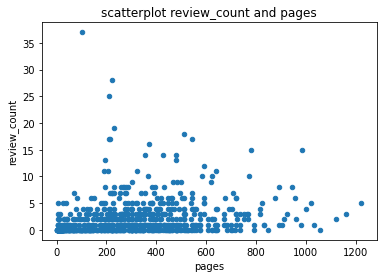

In [76]:
# 16 В большинстве у книг до 600 страниц среднее количество отзывов совпадает, начиная от 700 страниц количество отзывов уменьшается
df.plot.scatter(x = 'pages', y = 'review_count', title = 'scatterplot review_count and pages')

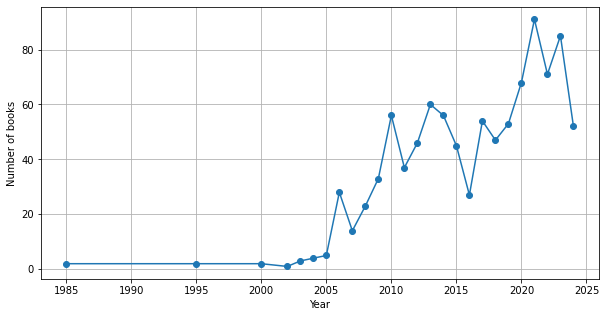

In [82]:
# 17 Количество издаваемых книг росло с 1985 года, достигло пика в 2021 
plt.figure(figsize=(10, 5))
plt.plot(df.groupby('year').size().index, df.groupby('year').size().values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of books')
plt.grid()
plt.show()

In [115]:
# 19
df_new = df.groupby('author').agg({
    'name': 'count', 
    'rating': 'mean', 
    'review_count': 'mean' 
}).rename(columns={
    'name': 'num_books',
    'rating': 'avg_rating',
    'reviews': 'avg_review_count'
})
df_new

,num_books,avg_rating,review_count
author,,,
Arsen Gonian,1,5.0,1.0
C. И. Никишов,1,4.7,3.0
Eugeny Shtoltc,2,2.5,0.0
Jade Carter,1,0.0,0.0
Nulls,1,4.4,6.0
...,...,...,...
Ян Пойнтер,1,3.6,2.0
а. ф. задорожный,1,0.0,0.0
коллектив авторов,5,2.8,0.4
